## Datahandling og statistikk


# Statistikk

- Sannynlighet
- Prosent
- Gjennomsnitt/median/typetall
- Regresjonsanalyse
- Avvik


# Lesing og plotting av data

Program som leser av data om solflekker og plotter det.

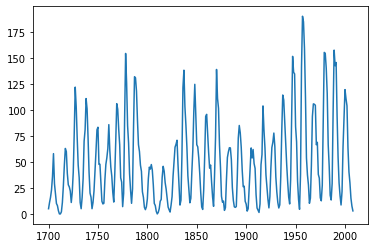

In [7]:
from pylab import *

data = loadtxt("sunspots.txt", skiprows=1, delimiter=',', dtype=float)

nr = data[:, 0]
solflekker = data[:, 1]

plot(nr, solflekker)
show()


For at man skal kunne lese av data må datafilen være i samme mappe som programmet som skal lese det av.
Vi brukre loadtxt funksjonen for å lese av dataen.

# Regrejon

Man kan bruke regresjon for å få datapunkter

Regresjon er å finne en funsjon om er best mulig tilpasset alle punktene i et datasett.

Her er et eksempel på bruk av regresjon i temperaturer salter løser seg opp i

[2.94642857e-04 5.53571429e-03 3.56928571e+01]
[-4.22453704e-05  1.50198413e-02 -1.89480820e+00  8.84246032e+01]
0.9999443232696628


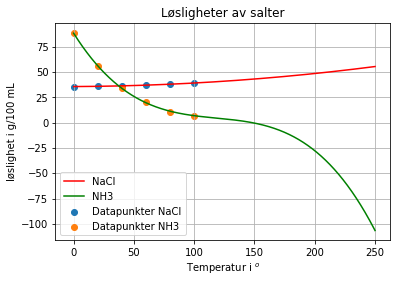

In [8]:
from pylab import *
from sklearn.metrics import r2_score

T = array([0, 20, 40, 60, 80, 100])
sol_NH3 = array([88.5, 56.0, 34.0, 20.0, 11.0, 7.0])
sol_NaCl = array([35.7, 35.9, 36.4, 37.1, 38.0, 39.2])

# Regresjon

#NaCl
scatter(T, sol_NaCl, label = "Datapunkter NaCl")
gradNaCl = 2
reg_NaCl = polyfit(T, sol_NaCl, gradNaCl)
print(reg_NaCl)

x1 = linspace(0, 250, 100000)
a1 = reg_NaCl[0]
b1 = reg_NaCl[1]
c1 = reg_NaCl[2]
y1 = a1*x1**2 + b1*x1 + c1

plot(x1, y1, color='red', label='NaCl')


#NH3
scatter(T, sol_NH3, label = "Datapunkter NH3")
gradNH3 = 3
reg_NH3 = polyfit(T, sol_NH3, gradNH3)
print(reg_NH3)

x2 = linspace(0, 250, 100000)
a2 = reg_NH3[0]
b2 = reg_NH3[1]
c2 = reg_NH3[2]
d2 = reg_NH3[3]
y2 = a2 * x2**3 + b2*x2**2 + c2*x2 + d2
y2_R2 = a2 * T**3 + b2*T**2 + c2*T + d2

plot(x2, y2, color='green', label='NH3')

#R2
R2 = r2_score(sol_NH3, y2_R2)
print(R2)

#Plotting
title('Løsligheter av salter')
xlabel('Temperatur i $^o$')
ylabel('løslighet i g/100 mL')
legend()
grid()
show()

# Statistikk

Gjennomsnittet av n målinger er definert som summen av alle målingene dividert på n

$$\bar{x} = \frac{\sum_{i=1}^{n}x_i}{n}$$

Standardavviket til n målinger er definert slik:

$$s = \sigma ^{2} = \sqrt{\frac{\sum_{i = 1}^{n} (x_i - \bar{x}) ^{2}}{n}}$$

I python kan vi fremstille gjennomsnitt og standardavvik slik:

In [9]:
from pylab import *

data = loadtxt('testdata.txt', skiprows=1, delimiter =', ')


nr = data[:, 0]
height = data[:, 1]


snitt = round(mean(height), 2)


avvik = round(std(height), 2)

print("Snitt: {}m, Standardavviket: {}m".format(snitt, avvik)) 


Snitt: 1.77m, Standardavviket: 0.08m


## Framstillinger

Vi kan også fremstille statistikk som kakediagrammer og søylediagrammer

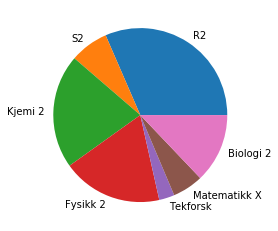

In [12]:
from pylab import *

fag = ['R2', 'S2', 'Kjemi 2', 'Fysikk 2',
       'Tekforsk', 'Matematikk X', 'Biologi 2']

antall = [110, 25, 74, 65, 10, 20, 45]

pie(antall, labels=fag)

show()

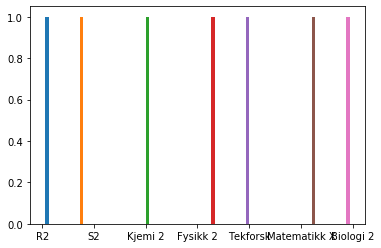

In [11]:
hist(fag)
'''
Histogrammet vil bli feil, fordi den bare vier hvor mange ganger elementene i
listen fag nevnes. I et problem som dette blir det feil å bruke histogram for
å representere dataen. Ikke
'''
show()

# Usikkerhetsplotting

Usikkerhetstolpeplott

- Det er også mange måter å grafik framstille statistisk spredning på.
- Vi ser på usikkerhetsstolpeplott

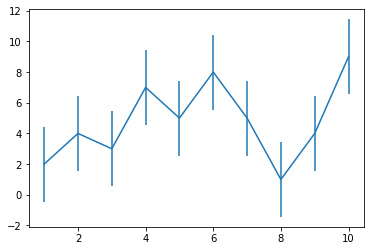

In [15]:
from pylab import *

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [2, 4, 3, 7, 5, 8, 5, 1, 4, 9]

errorbar(x, y, yerr = std(y))

show()